In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import jsons
import seaborn as sn
from scipy.stats import linregress

In [48]:
#read csv of iso codes
file = './Resources/iso_code.csv'
iso_code_df = pd.read_csv(file)

In [3]:
#adding empty columns to df
iso_code_df['GDP'] = ''
iso_code_df['Total_Pop'] = ''
iso_code_df['Pop_Den'] = ''
iso_code_df['health_exp'] = ''

,iso_code,total_vaccinations,people_fully_vaccinated_per_hundred,GDP,Total_Pop,Pop_Den,health_exp
0,ABW,73360.0,18.84,,,,
1,AIA,6898.0,5.22,,,,
2,ALB,400064.0,0.02,,,,
3,AND,26414.0,6.06,,,,
4,ARE,10336214.0,38.79,,,,
...,...,...,...,...,...,...,...
116,TUR,21678461.0,9.84,,,,
117,URY,1695351.0,15.95,,,,
118,USA,232407669.0,28.93,,,,
119,ZAF,292623.0,0.49,,,,


In [4]:
# JSON requests from world bank database
gdp_list= []

variable= ['NY.GDP.MKTP.CD','SP.POP.TOTL.','EN.POP.DNST','SH.XPD.PVTD.CH.ZS']
date= '2018'

for j, var in enumerate(variable): 
    for i, iso in enumerate(iso_code_df['iso_code']):
        try:
            base_url = f'http://api.worldbank.org/v2/country/{iso}/indicator/{var}?date={date}&format=json'
            response = requests.get(base_url).json()

            responseJSON = response[1][0]['value']
            
            #add response to dataframe
            iso_code_df.iloc[i,3+j] = responseJSON

        except: 
            print(f'Error {iso},{var} data missing.')


Error AIA,NY.GDP.MKTP.CD data missing.
Error FLK,NY.GDP.MKTP.CD data missing.
Error GGY,NY.GDP.MKTP.CD data missing.
Error JEY,NY.GDP.MKTP.CD data missing.
Error MSR,NY.GDP.MKTP.CD data missing.
Error OWID_CYN,NY.GDP.MKTP.CD data missing.
Error OWID_ENG,NY.GDP.MKTP.CD data missing.
Error OWID_NIR,NY.GDP.MKTP.CD data missing.
Error OWID_SCT,NY.GDP.MKTP.CD data missing.
Error OWID_WLS,NY.GDP.MKTP.CD data missing.
Error SHN,NY.GDP.MKTP.CD data missing.
Error AIA,SP.POP.TOTL. data missing.
Error FLK,SP.POP.TOTL. data missing.
Error GGY,SP.POP.TOTL. data missing.
Error JEY,SP.POP.TOTL. data missing.
Error MSR,SP.POP.TOTL. data missing.
Error OWID_CYN,SP.POP.TOTL. data missing.
Error OWID_ENG,SP.POP.TOTL. data missing.
Error OWID_NIR,SP.POP.TOTL. data missing.
Error OWID_SCT,SP.POP.TOTL. data missing.
Error OWID_WLS,SP.POP.TOTL. data missing.
Error SHN,SP.POP.TOTL. data missing.
Error AIA,EN.POP.DNST data missing.
Error FLK,EN.POP.DNST data missing.
Error GGY,EN.POP.DNST data missing.
Error 

In [5]:
# Drop rows with missing values
iso_code_df.replace('',np.NaN,inplace=True)
iso_cleaned_df = iso_code_df.dropna()


In [31]:
# Cut data into GDP quartiles
bins = pd.qcut(iso_cleaned_df['GDP'],4,labels=['1','2','3','4'])
iso_cleaned_df['Bins'] = bins

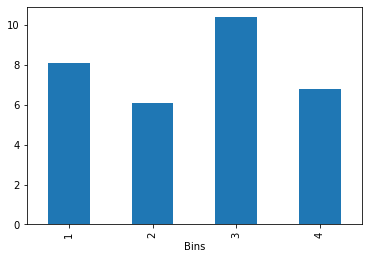

In [47]:
# Group data by bins and look at mean vaccination
iso_cleaned_df.groupby('Bins')['people_fully_vaccinated_per_hundred'].mean().plot(kind='bar')

In [ ]:
# seaborn pairwise plotting
sn.pairplot(iso_cleaned_df)

In [ ]:
#Save df to csv
iso_cleaned_df.to_csv('./Resources/isoDataFinal.csv',index=False)

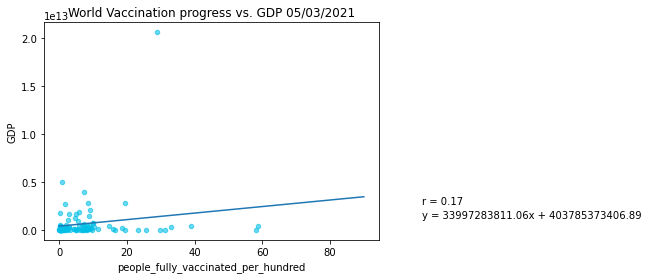

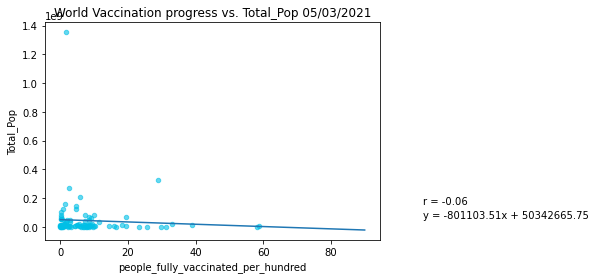

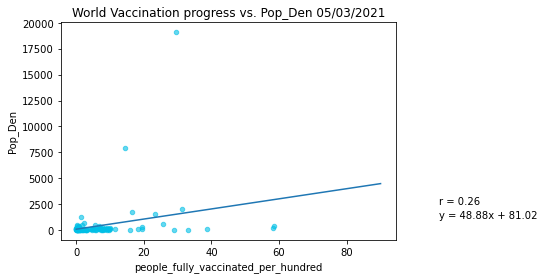

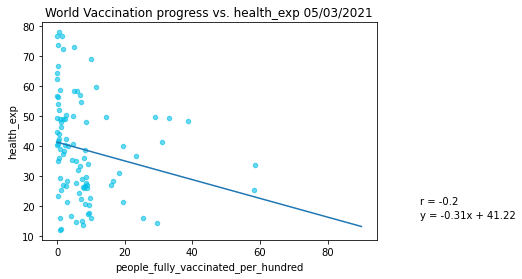

In [8]:
# Linear Regression for each data series
y_values = ['GDP','Total_Pop','Pop_Den','health_exp']
for metric in y_values:
    #use northern data for metrics
    x1 = iso_cleaned_df['people_fully_vaccinated_per_hundred']
    y1 = iso_cleaned_df[metric]
    analysisDate = '05/03/2021'
    
    #lin reg line
    slope, intercept, rvalue, pvalue, stderr = linregress(x1,y1)
    z = range(0,100,10)
    w = slope * z + intercept
    
    #Scatter plot and lin reg line Northern
    fig, ax = plt.subplots()
    scatter = ax.scatter(x1, y1, s=20,color=(0,.75,.9),alpha=.6)
    
    plt.plot(z,w)
    plt.text(1,.25,f'r = {round(rvalue,2)}', transform=plt.gcf().transFigure)
    plt.text(1,.20,f'y = {round(slope,2)}x + {round(intercept,2)}', transform=plt.gcf().transFigure)
    
    #Formatting
    plt.title('World Vaccination progress vs. '+y1.name + ' '+ analysisDate)
    plt.xlabel(x1.name)
    plt.ylabel(y1.name)
    
    #Save figure and display
    plt.savefig(f'./Resources/Output/{x1.name}.{y1.name}Line.png')
    plt.show()
    

In [ ]:
# best performing countries
iso_cleaned_df[['iso_code','people_fully_vaccinated_per_hundred']].sort_values(by='people_fully_vaccinated_per_hundred',ascending=False).head(5)

In [ ]:
#worst performing Contries
iso_cleaned_df[['iso_code','people_fully_vaccinated_per_hundred']].sort_values(by='people_fully_vaccinated_per_hundred').head(5)

In [ ]:
iso_cleaned_df